<a href="https://colab.research.google.com/github/fjadidi2001/Artificial_Intelligence_Learning/blob/master/Alzheimer's_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explanation:
<br>

## architecture:

> This project presents a CNN architecture that uses MRI data from the ADNI dataset to classify Alzheimer’s disease. The network leverages different CNN models, filter sizes, and pooling layers to extract features from MRI images, enabling precise classification of AD subtypes and stages. Accurate classification can aid in early detection, personalized treatment planning, disease monitoring, and prognostic assessment, showcasing the potential of this CNN architecture to assist medical professionals and researchers in making informed decisions about AD patients.



## what is Alzheimer's disease (AD)?

> Alzheimer's disease (AD) is a common brain ailment leading to memory loss and cognitive decline, ranking as a significant cause of mortality.

## what is MCI?

> Mild cognitive impairment (MCI) lies between normal brain function and AD, with AD progressing from the prodromal stage of MCI to dementia. Identifying MCI early can help delay or prevent the progression to AD, with studies showing a 10-15% annual development rate from MCI to AD. Intermediate MCI stages show subtle brain lesion variations.



> Early mild cognitive impairment (EMCI) emerges in the initial phase of MCI, while late mild cognitive impairment (LMCI) or progressive MCI (PMCI) indicates worsening symptoms over time. As symptoms evolve, transitioning between stages requires careful monitoring by medical professionals. Researchers face challenges in identifying distinct symptoms across different sets. Medical imaging techniques like PET, MRI, and CT provide crucial standardized testing and images for experimental processes in this field.



## Features extracted from MRI

> MRI is a widely recognized and versatile tool for diagnosing various diseases such as brain tumors, neurological disorders, spinal cord injuries, and liver diseases. Its high sensitivity allows for early disease detection. Different MRI sequences are suited for different disorders, and MRI images are frequently used for Alzheimer's disease classification. Features extracted from MRI images, **such as grey and white matter volumes, cortical thickness, and CSF levels, aid in categorizing and diagnosing mild cognitive impairment or Alzheimer's disease**. Pre-trained CNNs show promise in automatically diagnosing cognitive illnesses from brain MRI images.

# connect to drive

In [112]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
# Path to your dataset
dataset_path = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset'

# import libraries

In [114]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import cv2
import random
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt


# Image preprocessing
1. split dataset
2. normalize images

In [115]:
# Path to the directories containing the AD and MCI images
ad_path = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/AD'
mci_path = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/MCI'

# Function to get the list of image file paths in a directory
def get_image_paths(directory):
    return [os.path.join(directory, image) for image in os.listdir(directory)]

# Get the list of image file paths for AD and MCI images
ad_images = get_image_paths(ad_path)
mci_images = get_image_paths(mci_path)

# Combine image paths with labels
ad_labels = np.zeros(len(ad_images))
mci_labels = np.ones(len(mci_images))

# Combine all images and labels
all_images = ad_images + mci_images
all_labels = np.concatenate([ad_labels, mci_labels])

# Split the dataset into training, testing, and validation sets
X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Normalize the images (You should replace this with your actual normalization code)
def normalize_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert image to RGB
    image = image / 255.0  # Normalize pixel values between 0 and 1
    return image_path
# Apply normalization to all splits
X_train = [normalize_image(image) for image in X_train]
X_test = [normalize_image(image) for image in X_test]
X_val = [normalize_image(image) for image in X_val]
# Check the distribution of classes in each split
print("Training set - AD: {}, MCI: {}".format(np.sum(y_train == 0), np.sum(y_train == 1)))
print("Testing set - AD: {}, MCI: {}".format(np.sum(y_test == 0), np.sum(y_test == 1)))
print("Validation set - AD: {}, MCI: {}".format(np.sum(y_val == 0), np.sum(y_val == 1)))

Training set - AD: 609, MCI: 455
Testing set - AD: 204, MCI: 129
Validation set - AD: 162, MCI: 105


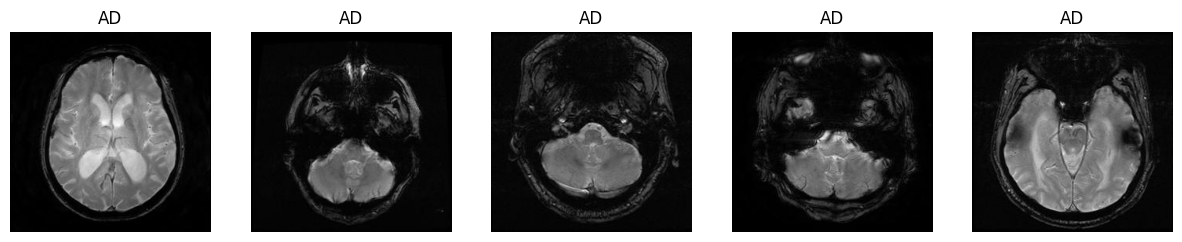

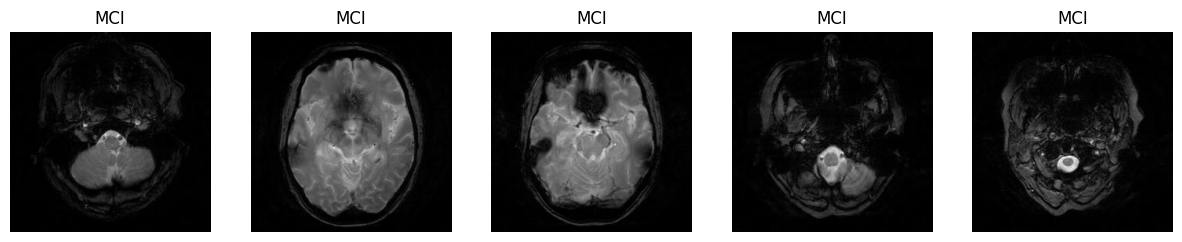

In [116]:
# Display example images from AD and MCI datasets
num_examples = 5  # Number of examples to display

# Function to display example images
def display_examples(image_paths, dataset_name):
    plt.figure(figsize=(15, 3))
    for i in range(num_examples):
        image = cv2.imread(image_paths[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_examples, i+1)
        plt.imshow(image)
        plt.axis('off')
        plt.title(dataset_name)
    plt.show()

# Display example images from AD dataset
display_examples(ad_images, 'AD')

# Display example images from MCI dataset
display_examples(mci_images, 'MCI')

# Data augmentation

To expand the primary dataset as per the specified image modes, resulting in a fivefold increase in data volume. This augmentation will yield an additional four images from each original photo.

The proposed CNN framework is designed for end-to-end AD classification, starting from image acquisition to classification. It incorporates
1. adaptive thresholding,
2. data augmentation,
3. Glorot Uniform weight initializer,
4. and the Adam optimizer
<br>
to enhance **performance**.


> Data Augmentation: To expand the training dataset and improve the model's accuracy, data augmentation is performed. The framework applies various augmentation factors such as horizontal flipping, shearing, shifting, rotating, and zooming to create new and different training examples.

In the paper "A CNN based framework for classification of Alzheimer’s disease," the authors describe their preprocessing and augmentation steps as part of their end-to-end framework for classifying Alzheimer's disease using MRI scans. Here's how they preprocess and augment the data:

1. **Acquisition and Annotation**: The first step is to acquire MRI images in the '.nii' format and convert them to '.png' files. Only images containing the full shape of the brain are used, and they are annotated with classes to facilitate future processing.

2. **Preprocessing and Augmentation**: This layer takes the annotated images as input and applies several preprocessing steps:

   - **Grayscale Conversion**: The images are converted to grayscale.
   - **Adaptive Thresholding**: Instead of using a global threshold for all pixels, the threshold is dynamically changed over the image to handle varying lighting conditions.
   - **Cropping and Filtration**: The images are cropped and filtered to generate grayscale images of size (256, 256).
   - **Resizing**: A transformer is used to resize the produced images to (128, 128) and (64, 64).

3. **Data Augmentation**: To expand the training dataset and improve the model's accuracy, data augmentation is performed. The framework applies various augmentation factors such as horizontal flipping, shearing, shifting, rotating, and zooming to create new and different training examples.

4. **Cross-validation**: The dataset is divided into training, validation, and testing sets. The training set is further divided into training and validation subsets to avoid overfitting and to obtain the best values for training parameters.

5. **CNN Model**: The CNN architecture consists of three convolutional layers, with max-pooling after each layer. The model uses activation functions like ReLU and SoftMax for the output layer to enhance the classification process.

6. **Classification Layer**: The Glorot Uniform weight initializer is used to initialize the network weights, and the Adam optimizer is applied in the optimization process to achieve quicker convergence.

The paper emphasizes the importance of these preprocessing and augmentation steps in improving the performance of the CNN model for classifying Alzheimer's disease from MRI scans.

In [117]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from skimage import filters, transform, exposure

# Path to the directories containing the AD and MCI images
ad_path = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/AD'
mci_path = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/MCI'

# Function to get the list of image file paths in a directory
def get_image_paths(directory):
    return [os.path.join(directory, image) for image in os.listdir(directory)]

# Get the list of image file paths for AD and MCI images
ad_images = get_image_paths(ad_path)
mci_images = get_image_paths(mci_path)

# Combine image paths with labels
ad_labels = np.zeros(len(ad_images))
mci_labels = np.ones(len(mci_images))

# Combine all images and labels
all_images = ad_images + mci_images
all_labels = np.concatenate([ad_labels, mci_labels])

# Function to apply augmentation to an image
def augment_image(image_path):
    # Load image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert image to RGB

    # Adaptive thresholding
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    thresholded = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)

    # Cropping
    cropped = image[50:150, 50:150, :]  # Example: crop from (50,50) to (150,150)

    # Filtration (Gaussian blur)
    filtered = cv2.GaussianBlur(image, (5, 5), 0)

    # DIP (Digital Image Processing) operation (histogram equalization)
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])
    dip_processed = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

    # Combine all augmented images
    augmented_images = [image, thresholded, cropped, filtered, dip_processed]

    return augmented_images

# Augment all images in the dataset
augmented_data = []
for image_path, label in zip(all_images, all_labels):
    augmentations = augment_image(image_path)
    for augmented_image in augmentations:
        augmented_data.append((augmented_image, label))

# Separate augmented images and labels
augmented_images = [pair[0] for pair in augmented_data]
augmented_labels = np.array([pair[1] for pair in augmented_data])

# Split the augmented dataset into training, testing, and validation sets
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(augmented_images, augmented_labels, test_size=0.2, random_state=42)
X_train_aug, X_val_aug, y_train_aug, y_val_aug = train_test_split(X_train_aug, y_train_aug, test_size=0.2, random_state=42)

# Normalize the augmented images (You should replace this with your actual normalization code)
def normalize_image(image):
    image = image / 255.0  # Normalize pixel values between 0 and 1
    return image

# Apply normalization to all splits
X_train_aug = [normalize_image(image) for image in X_train_aug]
X_test_aug = [normalize_image(image) for image in X_test_aug]
X_val_aug = [normalize_image(image) for image in X_val_aug]

# Check the distribution of classes in each split
print("Training set - AD: {}, MCI: {}".format(np.sum(y_train_aug == 0), np.sum(y_train_aug == 1)))
print("Testing set - AD: {}, MCI: {}".format(np.sum(y_test_aug == 0), np.sum(y_test_aug == 1)))
print("Validation set - AD: {}, MCI: {}".format(np.sum(y_val_aug == 0), np.sum(y_val_aug == 1)))


Training set - AD: 3148, MCI: 2176
Testing set - AD: 961, MCI: 703
Validation set - AD: 766, MCI: 566
